In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
df = pd.read_csv("PIB2-pRL1007.csv")
df

,date,strain,plasmid,name,number,dots,cells
0,101024,172,empty,172,1,10,55
1,101024,172,empty,172,1,7,43
2,101024,172,empty,172,1,9,50
3,101024,172,empty,172,2,11,59
4,101024,172,empty,172,2,8,58
5,101024,172,empty,172,3,5,40
6,101024,172,empty,172,3,7,48
7,101024,172,empty,172,3,5,49
8,101024,399,empty,399,1,3,52
9,101024,399,empty,399,1,3,49


In [3]:
# calculate SE / cells (%)
df_number = df.groupby(["name", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,name,number,date,strain,plasmid,dots,cells,SE
0,172,1,303072,516,emptyemptyempty,26,148,17.567568
1,172,2,202048,344,emptyempty,19,117,16.239316
2,172,3,303072,516,emptyemptyempty,17,137,12.408759
3,399,1,303072,1197,emptyemptyempty,8,140,5.714286
4,399,2,303072,1197,emptyemptyempty,3,148,2.027027
5,399,3,303072,1197,emptyemptyempty,4,106,3.773585
6,1007,1,303072,1197,100710071007,25,153,16.339869
7,1007,2,303072,1197,100710071007,25,185,13.513514
8,1007,3,303072,1197,100710071007,34,179,18.994413


In [4]:
# calculate average and sem of different condition
# WT vs atg18D vs atg18D + pRL1007 (pRS416-3FLAG-ATG18)
SE_mean = df_number.groupby('name')["SE"].mean().values
SE_sem = df_number.groupby("name")["SE"].std().values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

[15.40521431  3.83829922 16.28259873]
[1.54651443 1.06491159 1.58245862]


## Welth's t-test collected with Holm-sidak

In [5]:
WT_SE = df_number[df_number["name"] == 172]["SE"]
atg18_SE = df_number[df_number["name"] == 399]["SE"]
pRL1007_SE = df_number[df_number["name"] == 1007]["SE"]

In [6]:
statistic, atg18_pvalue = stats.ttest_ind(WT_SE, atg18_SE, equal_var=False)
atg18_pvalue

0.005177994142818109

In [7]:
statistic, pRL1007_pvalue = stats.ttest_ind(WT_SE, pRL1007_SE, equal_var=False)
pRL1007_pvalue

0.7119697949444919

In [8]:
multipletests(pvals=[atg18_pvalue, pRL1007_pvalue], alpha=0.05, method="holm-sidak")

(array([ True, False]),
 array([0.01032918, 0.71196979]),
 0.025320565519103666,
 0.025)

## figure

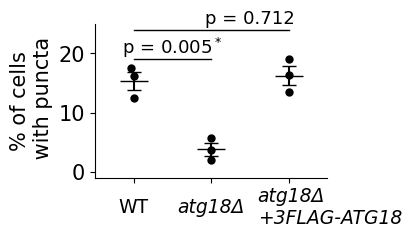

In [16]:
y = -6
fontsize = 15
fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
sns.swarmplot(x="name", y="SE", data=df_number, size=6, color="black")
ax.errorbar(x=[0, 1, 2], y=SE_mean, yerr=SE_sem, \
            capsize=5, fmt='_', ecolor='k', ms=20, mec='k')
# label of each strains
ax.text(0, y, "WT", ha="center", va='center', fontsize=fontsize-1.5)
ax.text(1, y, "atg18Δ", ha="center", va='center', fontstyle="italic", fontsize=fontsize-1.5)
ax.text(1.6, y, "atg18Δ\n+3FLAG-ATG18", ha="left", va='center', fontstyle="italic", fontsize=fontsize-1.5)
# figure frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x and y axis
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-1, 25)
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_yticks([0, 10, 20])
ax.set_yticklabels(["0", "10", "20"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

y_p = 19
ax.plot([0, 1], [y_p, y_p], color='k', lw=1)
ax.text(0.5, y_p+1, f'p = {atg18_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)
y_p2 = 24
ax.plot([0, 2], [y_p2, y_p2], color='k', lw=1)
ax.text(1.5, y_p2+1, f'p = {pRL1007_pvalue:.3f}', ha='center', fontsize=fontsize-2)

fig.savefig("output.jpg", bbox_inches="tight")
plt.show()